In [28]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

In [53]:
from utils import downloadData
from utils import dataProc
#download = downloadData.downloadData()
#download.getData()
data = dataProc.dataProc()
df = data.loadData()

df_dict = data.cleanData(df)

list files
['./data/2020may.xlsx', './data/2017.xlsx', './data/2020abr.xlsx', './data/2020ene.xlsx', './data/2020mar.xlsx', './data/2020jul.xlsx', './data/2013.xlsx', './data/2020jun.xlsx', './data/2019.xlsx', './data/2020ago.xlsx', './data/2015.xlsx', './data/2014.xlsx', './data/2018.xlsx']
years files
[PosixPath('2017.xlsx'), PosixPath('2013.xlsx'), PosixPath('2019.xlsx'), PosixPath('2015.xlsx'), PosixPath('2014.xlsx'), PosixPath('2018.xlsx'), PosixPath('2020ago.xlsx')]
Loading data
Loading data finished
Cleanning data
Cleaning data finsihed


In [54]:
#b = cleanData.cleanData()
#df_dict = b.cleanData()

In [55]:
df_dict.keys()

dict_keys(['2017', '2013', '2019', '2015', '2014', '2018', '2020'])

In [57]:
df_dict['2017'].head()

,departamento,municipio,operadora,contrato,campo,enero,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre
1,antioquia,PUERTO NARE,ecopetrol s.a.,operacion-directa ecopetrol,area teca-cocorna,1230.97,1108.93,1026.16,1035.77,1046.87,1122.08,1133.03,1163.72,1130.25,1077.69,1156.24,1099.28
2,antioquia,PUERTO NARE,mansarovar energy colombia ltd,nare asociacion,nare,271.742,257.036,252.903,232.9,261.774,216.059,193.717,161.835,231.971,244.219,222.163,208.825
3,antioquia,PUERTO NARE,mansarovar energy colombia ltd,nare asociacion,underriver,935.677,796.929,880.226,899.867,993.742,801.946,765.493,814.503,887.706,845.619,720.345,833.261
4,antioquia,PUERTO TRIUNFO,ecopetrol s.a.,operacion-directa ecopetrol,area teca-cocorna,393,386,361.613,365.433,395.613,381.826,369.09,342.075,279.994,263.75,281.705,277.985
5,antioquia,YONDO,ecopetrol s.a.,casabe,casabe,12745,12535.2,12756.4,12720.3,12491.9,13126.9,12376.6,12083.6,11965.4,11750.8,11931.9,11633.8


In [58]:
to_drop = ['departamento', 'municipio',
                   'operadora', 'contrato', 'cuenca','campo']
for year in df_dict.keys():
    for col in to_drop:
        if col in df_dict[year]:
            df_dict[year] = df_dict[year].drop(labels=[col], axis=1)

    df_dict[year] = df_dict[year].sum(axis =0)
            #df_dict[year] = pd.DataFrame(df_dict[year], columns = ['Month', 'Production'])
            #print(df_dict[year])

<AxesSubplot:xlabel='month'>

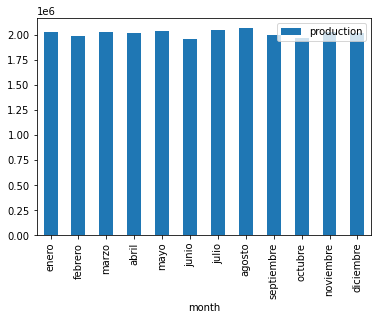

In [91]:
a = pd.DataFrame(df_dict['2013'],columns = ['production']).reset_index()
a=a.rename(columns={0:'month'})
a.plot.bar(x = 'month',y='production')

In [90]:
a

,0,production
0,enero,2.030461e+06
1,febrero,1.994911e+06
2,marzo,2.025345e+06
3,abril,2.022773e+06
4,mayo,2.037127e+06
5,junio,1.956449e+06
6,julio,2.045418e+06
7,agosto,2.066763e+06
8,septiembre,1.999561e+06
9,octubre,1.972531e+06


In [ ]:
January= df_dict['2020'].columns.get_loc("enero")
df_dict['2020']['Total_Prod']=df_dict['2020'].iloc[:,January::].fillna(0).sum(axis=1)

In [ ]:
df_dict['2020'].isnull().sum()

In [ ]:


df_dict = data.cleanData(df)

In [ ]:
#Eliminar duplicados, si los hay
df_dict['2020']=df_dict['2020'].drop_duplicates()

In [ ]:
df_dict['2020']

In [ ]:
Highest_Prod=df_dict['2020'].groupby('campo')['Total_Prod'].sum().reset_index(name ='Anual_Prod')
#Seleccionar los campos con mayor producción 
Highest_Prod.sort_values(by=['Anual_Prod'], ascending=False).iloc[0:5]

In [ ]:
Op_Field_2018=df_dict['2018'].groupby(['operadora','departamento'])['campo'].count().reset_index(name ='#Prod_Fields')
display(Op_Field_2018[(Op_Field_2018['departamento']=='CASANARE')&(Op_Field_2018['#Prod_Fields']>5)].count())
display(Op_Field_2018[(Op_Field_2018['departamento']=='CASANARE')&(Op_Field_2018['#Prod_Fields']>5)])

In [ ]:
Jan_2018= df_dict['2018'].columns.get_loc("enero")
df_dict['2018']['Total_Prod']=df_dict['2018'].iloc[:,Jan_2018::].fillna(0).sum(axis=1)
Cont_Highest_Prod= df_dict['2018'].groupby('contrato')['Total_Prod'].sum().reset_index(name ='Anual_Prod')
Cont_Highest_Prod.sort_values(by=['Anual_Prod'], ascending=False).iloc[0:5]

In [ ]:
Op_High_Prod_2019= df_dict['2019'].groupby('operadora')['agosto'].sum().reset_index(name ='Prod_Aug')
Op_High_Prod_2019.sort_values(by=['Prod_Aug'], ascending=False).iloc[0:10]